In [25]:
import os

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns

from datetime import datetime
from dateutil import parser


In [26]:
# format float in pandas
pd.options.display.float_format = '{:.4f}'.format
pd.options.display.max_columns = 50
pd.options.display.max_rows = 50

In [27]:
plt.style.use('seaborn-white')
rcParams['axes.labelsize'] = 'x-large'
rcParams['axes.edgecolor'] = 'black'
rcParams['axes.facecolor'] = 'white'
rcParams['axes.titlesize'] = 'x-large'
rcParams['axes.spines.top'] = False
rcParams['axes.spines.right'] = False
rcParams['axes.xmargin'] = 0.02
rcParams['axes.ymargin'] = 0.02
            
rcParams['axes.grid'] = True
rcParams['grid.linestyle'] = ':'
rcParams['grid.alpha'] = 0.2
rcParams['grid.color'] = 'black'
          
rcParams['figure.titlesize'] = 'x-large'
rcParams['figure.edgecolor']= 'black'
rcParams['figure.facecolor'] = 'white'
rcParams['figure.figsize'] = [12, 8]

rcParams['ytick.labelsize'] = 'large'
rcParams['xtick.labelsize'] = 'large'

In [28]:
print(os.getcwd())

C:\Users\smouz\OneDrive\Desktop\DataSci\Python\SP-Capstone-PY\Capstone


In [29]:
if 'Capstone' not in os.getcwd():
    os.chdir(str(os.environ['HOMEPATH']) + '\OneDrive\Desktop\DataSci\Python\SP-Capstone-PY\Capstone')
print('Working directory:', os.getcwd())
    

Working directory: C:\Users\smouz\OneDrive\Desktop\DataSci\Python\SP-Capstone-PY\Capstone


In [30]:
#, index_col='date_installed', parse_dates=True
# infer_datetime_format=True
pv_df_orig = pd.read_csv('openpv_all.csv',
                         low_memory=False,
                         infer_datetime_format=True,
                         )

In [31]:
def drop_n_reset(df):
  '''
  axis = {0: rows, 1: columns}
  Drop row if all values are missing in that column,
  Drop row if all values are missing in that row, drop duplicates
  Reset index, drop original index
  '''
  df = df.dropna(axis=1, how='all') 
  df = df.dropna(axis=0, how='all').drop_duplicates()
  return df.reset_index(drop=True)
  
def percent_missing(df, threshold=50, drop=False):
    """
    Calculate percent missing values in each column.
    Returns a series showing the proportion of missing vals in each column
    Drop columns which contain more than <threshold> missing values.
    """
    ms = (np.sum(df.isnull()) / len(df)) * 100
    if drop:
        return df.drop(labels=ms[ms >= threshold].index, axis=1)     
    else:
        return ms.sort_values()


# convert columns names to lower case
def map_lowercase(str_object):
    """
    str_object: can be of data type dataframe, string, series
    
    Converts input parameter to lowercase.
    """
    if isinstance(str_object, pd.Series):
        for item in str_object.columns.values:
            if str_object[item].dtype == np.object:
                str_object[item] = str_object[item].str.lower()
                print(item, '-converted to lower case')
    if isinstance(str_object, pd.DataFrame):
        return list(map(str.lower, str_object.columns.values))
    if isinstance(str_object, str):
        return str_object.lower()
    else:
        return list(map(str.lower, str_object))

#pv_df = pv_df.astype(str).apply(lambda x: x.str.lower())
#print(pv_df)  
        
def date_to_str(series_str):
    """
    Converts date input to string with format '%Y/%m/%d'
    """
#    convert_date = datetime.date(parser.parse(series_str))
#    date_time = '%Y/%m/%d'
#    date_str = str(pd.to_datetime(convert_date, format=date_time).date())
#    current_date = str(datetime_now)
    return str(parser.parse(series_str).date())


def missing_val_count(df, col_name, show_missing=False):
    '''
    Count missing values and show its index.
    Returns DF if show_missing=True
    '''
    if show_missing == True:
        return df[df.loc[:, col_name].isnull()]
    else:
        return col_name, np.count_nonzero(df.loc[:, col_name].isnull().values)

In [32]:
# ORIGINAL DF
'''
NOTE:
pd.isnull(pv_df.size_kw).value_counts()     # count null values
pd.notnull(pv_df.size_kw).all()             # returns TRUE when ALL values are not null in column
pd.notnull(pv_df.size_kw).any()             # returns TRUE when ANY values are not null in column
pd.isnull(pv_df_orig.inv_model_clean).all() # True if ALL values in column are NULL
pd.notnull(pv_df.size_kw).value_counts()    # number of missing values
'''

pv_df_orig.head()
# pv_df_orig.info()

,state,date_installed,incentive_prog_names,type,size_kw,appraised,zipcode,install_type,installer,cost_per_watt,cost,lbnl_tts_version_year,lbnl_tts,city,utility_clean,tech_1,model1_clean,county,annual_PV_prod,annual_insolation,rebate,sales_tax_cost,tilt1,tracking_type,azimuth1,...,rebate_real,model1,_3rdparty,inv_model_reported,microinv_solarhub,bipv_3,bipv_2,bipv_1,sales_tax_rate,sales_tax_cost_real,bipv_all,thinfilm_all,china,sys_sizeac,pbi_rate,new_constr,effic_1,cust_county,tracking,inv_model_clean,mod_cost_real,inv_cost_real,bos_powerclerk_real,permitting_real,3rdparty
0,TX,12/12/2013,Austin Energy,uir,10.5600,NaN,78702.0000,residential,NaN,2.8978,30600.5300,2016.0000,True,AUSTIN,Austin Energy,Poly,CHSM6610P-240,Travis,14999.8316,5.1577,15000.0,1151.6937,10.0000,Fixed,180.0000,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
1,TX,07/11/2014,Austin Energy,uir,12.7200,NaN,78702.0000,residential,NaN,3.1447,40000.0000,2016.0000,True,AUSTIN,Austin Energy,Mono,SLA265M3A,Travis,17811.5744,5.0856,15000.0,1507.1660,7.0000,Fixed,180.0000,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
2,TX,01/17/2014,Austin Energy,uir,5.4000,NaN,78702.0000,residential,NaN,4.1973,22665.5800,2016.0000,True,AUSTIN,Austin Energy,Mono,PLM-300M-72,Travis,7833.7428,5.2627,7735.5,854.0198,18.5000,Fixed,165.0000,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
3,TX,09/27/2012,Austin Energy,uir,7.5000,NaN,78702.0000,residential,NaN,3.7500,28125.0000,2016.0000,True,AUSTIN,Austin Energy,Poly,multiple matches,Travis,10151.7096,4.9210,14550.0,1058.5237,5.0000,Fixed,260.0000,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
4,TX,09/26/2012,Austin Energy,uir,5.0000,NaN,78702.0000,residential,NaN,3.8500,19250.0000,2016.0000,True,AUSTIN,Austin Energy,Poly,multiple matches,Travis,7307.1338,5.3048,9600.0,724.5006,33.0000,Fixed,205.0000,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan


In [33]:
# MISSING VALUES
# =============================================================================

# show cols which contain missing vals
print(percent_missing(pv_df_orig))

state                    0.0000
date_installed           0.0005
type                     0.0005
size_kw                  0.0005
zipcode                  0.0005
                         ...   
install_price_real_w   100.0000
installer_clean        100.0000
manuf1_                100.0000
rebate_real            100.0000
zip_available          100.0000
Length: 81, dtype: float64


In [34]:
# drop cols with over 80% missing vals
pv_df = percent_missing(pv_df_orig, threshold=80, drop=True)
# drop missing values in rows, columns, and duplicate rows
pv_df = drop_n_reset(pv_df)

In [35]:
print(percent_missing(pv_df))

#pv_df[pv_df['model1_clean'].notnull()][['tech_1', 'manuf2_clean', '3rdparty']]

state                          0.0000
date_installed                 0.0003
type                           0.0003
size_kw                        0.0003
zipcode                        0.0003
county                         1.7929
install_type                   4.0546
city                          21.2312
incentive_prog_names          21.3405
lbnl_tts                      21.3405
lbnl_tts_version_year         21.3405
utility_clean                 21.8556
annual_PV_prod                23.0182
annual_insolation             23.0182
cost                          25.0100
cost_per_watt                 25.0225
installer                     30.6081
tech_1                        42.4706
model1_clean                  42.4706
tracking_type                 47.5145
tilt1                         61.5391
rebate                        61.9820
azimuth1                      63.5880
sales_tax_cost                64.9275
3rdparty                      69.2053
manuf2_clean                  77.2419
appraised   

In [36]:
print(pv_df.info())
# pv_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 991027 entries, 0 to 991026
Data columns (total 29 columns):
state                          991027 non-null object
date_installed                 991024 non-null object
incentive_prog_names           779537 non-null object
type                           991024 non-null object
size_kw                        991024 non-null float64
appraised                      221407 non-null object
zipcode                        991024 non-null float64
install_type                   950845 non-null object
installer                      687692 non-null object
cost_per_watt                  743047 non-null float64
cost                           743171 non-null float64
lbnl_tts_version_year          779537 non-null float64
lbnl_tts                       779537 non-null object
city                           780620 non-null object
utility_clean                  774432 non-null object
tech_1                         570132 non-null object
model1_clean        

In [37]:
# explore columns
# =============================================================================
# 3rd Party
print(pv_df['3rdparty'].unique())

# replace all NaNs with 0, and set dtype to INT
pv_df['3rdparty'] = pv_df['3rdparty'].replace(np.nan, 0).astype(np.int)


[nan  1.]


In [38]:

"""
print(pv_df[pv_df['manuf2_clean'].notnull()]['manuf2_clean'])
print(pv_df[pv_df['installer'].notnull()][['installer', 'manuf2_clean', 'manuf3_clean']])
print(pv_df[pv_df['tech_1'].notnull()][['tech_1', 'install_type', 'type', 'utility_clean']])

print(pv_df.type.unique())
"""

"\nprint(pv_df[pv_df['manuf2_clean'].notnull()]['manuf2_clean'])\nprint(pv_df[pv_df['installer'].notnull()][['installer', 'manuf2_clean', 'manuf3_clean']])\nprint(pv_df[pv_df['tech_1'].notnull()][['tech_1', 'install_type', 'type', 'utility_clean']])\n\nprint(pv_df.type.unique())\n"

In [39]:
# drop specific cols
# =============================================================================
# drop columns after exploring them
drop_ls = ['lbnl_tts_version_year', 'lbnl_tts', 'manuf3_clean', 'manuf2_clean', 'appraised', 'type']
pv_df = pv_df.drop(labels=drop_ls, axis=1)

In [40]:
#%% LOWERCASE
# =============================================================================
# convert all column names to lowercase
pv_df.columns = map_lowercase(pv_df)

# convert all objects to lowercase 
# extract all columns of dtype 'object'
obj_col = [col for col in pv_df.columns.values if pv_df[col].dtype == np.object]


In [41]:
# for each column
# convert columns to lowercase if dtype is object
for item in obj_col:
    pv_df[item] = pv_df[item].str.lower()
    print(item, '-converted to lower case')


state -converted to lower case
date_installed -converted to lower case
incentive_prog_names -converted to lower case
install_type -converted to lower case
installer -converted to lower case
city -converted to lower case
utility_clean -converted to lower case
tech_1 -converted to lower case
model1_clean -converted to lower case
county -converted to lower case
rebate -converted to lower case
tracking_type -converted to lower case


In [42]:
# look at cols where cost is zero
cols_ls = ['cost', 'cost_per_watt', 'rebate', 'install_type', 'size_kw','incentive_prog_names']
print(pv_df.loc[pv_df['cost']==0, cols_ls])

# count null values
print(np.sum(pv_df.cost.isnull()))

# count number of rows where cost is 0
np.sum(pv_df['cost']==0)

# replace zeros with np.nan
pv_df['cost'] = pv_df['cost'].replace(0, np.nan)

         cost  cost_per_watt rebate install_type  size_kw incentive_prog_names
556    0.0000         0.0000    NaN  residential  12.3000                  NaN
7338   0.0000         1.0000    NaN  residential   3.4300                  NaN
8528   0.0000            nan    NaN      unknown   9.8800                  NaN
8683   0.0000            nan    NaN      unknown   2.6600                  NaN
8704   0.0000            nan    NaN      unknown  10.5000                  NaN
...       ...            ...    ...          ...      ...                  ...
385611 0.0000            nan    NaN  residential   4.5600                  NaN
385702 0.0000            nan    NaN  residential   7.4880                  NaN
386013 0.0000            nan    NaN  residential   5.7600                  NaN
386982 0.0000            nan    NaN  residential   4.3200                  NaN
387275 0.0000            nan    NaN   commercial 157.5000                  NaN

[178 rows x 6 columns]
247856


In [43]:
# DATETIME
# =============================================================================
#pv_df[pv_df['date_installed'].str.contains('nan')].date_installed
# check for string 'nan'
print("'nan' string values:", pv_df['date_installed'].str.contains('nan').value_counts())

# missing vals counts
print(missing_val_count(pv_df, 'date_installed'))
# this should result in 3 errors

# look at tail of date_installed col
print(pv_df['date_installed'].tail())


'nan' string values: False    991024
Name: date_installed, dtype: int64
('date_installed', 3)
991022    11/20/2017
991023    12/01/2017
991024    12/08/2017
991025    12/15/2017
991026    12/27/2017
Name: date_installed, dtype: object


In [44]:

def date_to_str(series_str):
    """
    Converts date input to string with format '%Y/%m/%d'
    Returns formated date string
    """
    try:
        return str(parser.parse(series_str).date())
    except Exception as e:
        print(e)
        pass
date_to_str(pv_df['date_installed'][5])
date_to_str('nan')


pv_df['date_installed'] = pv_df['date_installed'].map(date_to_str)

('Unknown string format:', 'nan')
Parser must be a string or character stream, not float
Parser must be a string or character stream, not float
Parser must be a string or character stream, not float


#### CONVERT DATA TYPE

Data on customer segment is mapped to one of six general types: RES, COM, SCHOOL, GOV, NONPROFIT,and NON-RES, the last one being used only if more-specific information on nonresidential customer type is unavailable.


In [45]:
# tech_1, tracking_type, install_type
# =============================================================================
print(pv_df.tech_1.unique())
print(pv_df.tracking_type.unique())
print(pv_df.install_type.unique())

['poly' 'mono' nan 'mono + a-si' 'crystalline' 'a-si' 'cigs' 'multiple'
 'a-si + micro-c' 'cdte' 'cis' 'thin film']
['fixed' nan 'dual-axis' 'mixed' 'single-axis']
['residential' 'commercial' 'agricultural' 'educational' 'nonprofit'
 'government' 'unknown' 'utility' nan 'customer' 'education' 'municipal'
 'agriculture' 'public' 'institutional' 'commercial - other' "gov't/np"
 'residential/sf' 'nonresidential' 'commercial - builders' 'commerical'
 'commercial - agriculture' 'small business' 'commercial - small business'
 'not stated']


In [46]:
# install_type: combine commercial categories into one commercial
installs = pd.Series(pv_df.install_type.unique()).astype(str)

In [47]:
#installs.str.findall('(commerc|agricult|business)')
installs.str.extractall('(commerc|agricult|business)')

0
   match          
1  0       commerc
2  0      agricult
12 0      agricult
15 0       commerc
19 0       commerc
21 0       commerc
   1      agricult
22 0      business
23 0       commerc
   1      business

In [48]:
# extract keywords, using mask, then select column 0
installs[installs.str.extract('(commerc|agricult|business)').notnull()[0]]
# same result as above 
installs[installs.str.contains('commerc|agricult|business')].values


array(['commercial', 'agricultural', 'agriculture', 'commercial - other',
       'commercial - builders', 'commercial - agriculture',
       'small business', 'commercial - small business'], dtype=object)

In [49]:
# replace np.nan, 'customer', and 'not stated' to 'unknown' category
replace_these = [np.nan, 'not stated', 'customer']
pv_df.install_type = pv_df.install_type.replace(replace_these, 'unknown')

In [50]:
# combine the split categories into mroe general categories
coms = ['commercial - small business', 'small business', 'commercial - agriculture',
        'commerical', 'commercial - builders', 'commercial - other', 'commercial',
        'agricultural', 'agriculture']
edu = ['institutional', 'educational']
gov = ['municipal', 'public', "gov't/np"]

pv_df.install_type = pv_df.install_type.replace(coms, 'commercial')
pv_df.install_type = pv_df.install_type.replace(edu, 'education')
pv_df.install_type = pv_df.install_type.replace(gov, 'government')
pv_df.install_type = pv_df.install_type.replace("residential/sf", 'residential')

In [51]:
# count each category in install_type
print(pv_df.install_type.value_counts())

residential       886725
unknown            56012
commercial         35587
government          5665
nonprofit           4125
education           2682
utility              228
nonresidential         3
Name: install_type, dtype: int64


In [59]:
# sns.barplot??

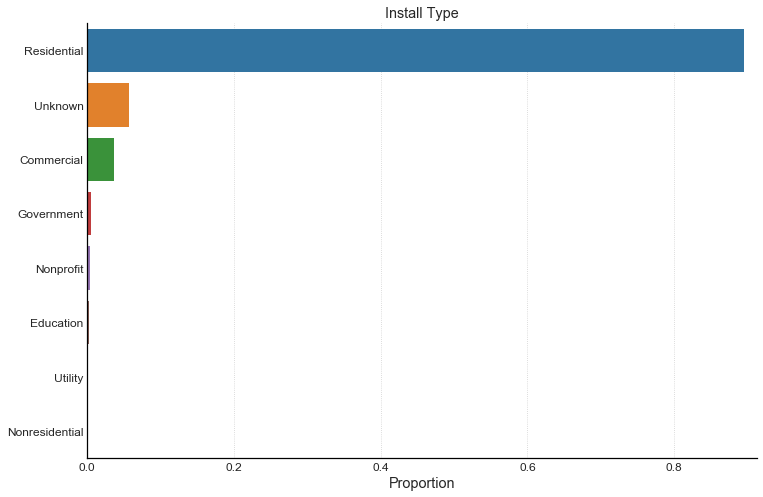

In [63]:
sns.barplot(x=pv_df.install_type.value_counts().values/pv_df.shape[0],
            y=pv_df.install_type.value_counts().index.str.capitalize(),
#             orient='v'
           )
plt.title('Install Type')
plt.xlabel('Proportion')
plt.show()

In [26]:

# select residential install type
pv_df = pv_df[pv_df['install_type'] == 'residential']

# drop missing vals, and reset index
pv_df = drop_n_reset(pv_df)

# check missing values
percent_missing(pv_df)

state                          0.0000
install_type                   0.0000
zipcode                        0.0000
3rdparty                       0.0000
date_installed                 0.0000
size_kw                        0.0000
county                         1.0487
city                          19.7285
incentive_prog_names          19.9041
utility_clean                 20.2723
annual_pv_prod                21.5651
annual_insolation             21.5651
cost_per_watt                 25.4072
cost                          25.4177
installer                     27.6593
model1_clean                  39.7822
tech_1                        39.7822
tracking_type                 44.1172
tilt1                         59.2087
azimuth1                      61.5380
rebate                        62.5498
sales_tax_cost                66.1306
reported_annual_energy_prod   79.1423
dtype: float64

In [27]:
# CONVERT TO CATGORICAL DTYPE
# =============================================================================
# convert multiple columns to categorical dtype
cols_cat = ['tech_1', 'tracking_type', 'install_type']
pv_df[cols_cat] = pv_df[cols_cat].astype('category')


In [28]:
# unique codes, -1 implies missing value
pv_df.tech_1.cat.codes.unique()
pv_df.tracking_type.cat.codes.unique()

array([ 1, -1,  0,  2,  3], dtype=int64)

In [29]:
# installer and utility
print(pv_df.utility_clean.nunique())
print(pv_df.utility_clean.value_counts()[:10])

270
pacific gas & electric company             187880
southern california edison                 148612
san diego gas & electric company            64448
national grid                               39055
arizona public service                      38045
los angeles department of water & power     18808
pseg long island                            17209
nstar (dba eversource)                      15367
jcp&l                                       14849
salt river project                          14565
Name: utility_clean, dtype: int64


In [30]:
print(pv_df.installer.nunique())
print(pv_df.installer.value_counts()[:10])

8433
solarcity            165026
vivint                41242
verengo               16373
sungevity             14384
rec solar             13938
sunpower              13226
petersendean          10392
rgs/real goods         9948
sunrun                 9941
grid alternatives      7806
Name: installer, dtype: int64


In [31]:
# groupby tech_1 and compute average cost, size_kw for each category
pv_df.groupby('tech_1').mean()[['cost', 'size_kw', 'cost_per_watt']].sort_values('cost', ascending=False)

,cost,size_kw,cost_per_watt
tech_1,,,
cdte,50631.0251,6.1348,8.7416
mono + a-si,45243.8496,6.1107,7.7390
multiple,38651.1919,6.0773,7.4085
a-si,36915.8284,8.4892,7.2485
crystalline,35453.7594,7.6156,4.8913
mono,33338.4249,6.2570,5.5660
poly,31759.6256,6.1045,5.3046
thin film,30254.2195,6.1876,4.8949
a-si + micro-c,25184.8569,5.5963,4.4235


In [32]:
pv_df.groupby('install_type').mean()[['cost', 'size_kw', 'cost_per_watt']].sort_values('cost', ascending=False)

,cost,size_kw,cost_per_watt
install_type,,,
residential,34092.6601,7.3808,5.7947


In [33]:
pv_df.groupby('tracking_type').mean()[['cost', 'size_kw', 'cost_per_watt']].sort_values('cost', ascending=False)

,cost,size_kw,cost_per_watt
tracking_type,,,
dual-axis,46659.2676,7.9264,6.0740
single-axis,33477.0021,6.6920,5.4761
fixed,33135.8722,6.2196,5.5077
mixed,25542.6218,6.2681,4.1950


In [34]:
# run function again to make sure there no duplicate rows, missing rows or columns
pv_df = drop_n_reset(pv_df)


In [35]:
#%% ZIPCODE DTYPE
# =============================================================================

# convert zipcode column to object and format for 5 digits
# DO NOT convert to any numerical dtype, this will remove preceeding zero

pv_df.sort_values(by = ['zipcode']).zipcode.head(10)
# NOTE:
# not all zipcodes are 5 digit length

340134     0.0000
341749   206.0000
341872   209.0000
340736   214.0000
341574   236.0000
339842   236.0000
341725   236.0000
339220   242.0000
339339   244.0000
341589   253.0000
Name: zipcode, dtype: float64

In [36]:
# replace NaNs with zeros, then convert dtype to INT
pv_df['zipcode'] = pv_df['zipcode'].replace(np.nan, 0)
pv_df['zipcode'] = pv_df['zipcode'].astype(np.int)

# TEST 1: zipcodes for length of 5 digits
# convert dtype to string then check length
zipcodes = np.array([len(str(pv_df['zipcode'].values[i])) for i in range(len(pv_df))])
# count of zipcodes which do not equal length of 5
len(zipcodes[zipcodes != 5])

127626

In [37]:
# format zipcodes to 5-dig, some zipcodes are only 4-digits
print('{:05d}'.format(pv_df['zipcode'][25]))

# use MAP for format entire Series
pv_df['zipcode'] = pv_df['zipcode'].map('{:05d}'.format)

47401


In [38]:
# TEST 2: zipcodes for length of 5 digits
# count number of zipcodes not equal to length of 5
zipcodes = np.array([len(pv_df['zipcode'][i]) for i in range(len(pv_df))])
len(zipcodes[zipcodes != 5])

if np.count_nonzero(zipcodes != 5) == 0:
    print('SUCCESS!!!')

SUCCESS!!!


In [39]:
# check indecies     
pv_df.loc[1975:2025, 'zipcode'].head(10)

# SUCCESS!!!

1975    78260
1976    78260
1977    78260
1978    78260
1979    78260
1980    78260
1981    78260
1982    78260
1983    78260
1984    78260
Name: zipcode, dtype: object

In [40]:
# STATES
# =============================================================================
# number of unique states
print(pv_df.state.nunique())
# OH, MD and PA contain an empty string, PR and DC are not states
print(pv_df.state.unique())


53
['tx' 'ca' 'ok' 'il' 'in' 'va' 'oh' 'fl' 'ny' 'ma' 'pa' 'az' 'ut' 'ky'
 'de' 'md' 'co' 'ms' 'wa' 'hi' 'ga' 'me' 'nh' 'ct' 'nm' 'al' 'ia' 'mo'
 'wi' 'nj' 'ak' 'mn' 'mi' 'mt' 'id' 'ri' 'ne' 'dc' 'ar' 'ks' 'wv' 'tn'
 'sd' 'nc' 'vt' 'nv' 'la' 'or' 'nd' 'sc' 'wy' 'pr' 'oh ']


In [41]:
# MAP str.strip function to remove whitespaces
pv_df.state = pv_df.state.map(str.strip)
pv_df.state.unique() 

array(['tx', 'ca', 'ok', 'il', 'in', 'va', 'oh', 'fl', 'ny', 'ma', 'pa',
       'az', 'ut', 'ky', 'de', 'md', 'co', 'ms', 'wa', 'hi', 'ga', 'me',
       'nh', 'ct', 'nm', 'al', 'ia', 'mo', 'wi', 'nj', 'ak', 'mn', 'mi',
       'mt', 'id', 'ri', 'ne', 'dc', 'ar', 'ks', 'wv', 'tn', 'sd', 'nc',
       'vt', 'nv', 'la', 'or', 'nd', 'sc', 'wy', 'pr'], dtype=object)

In [42]:
# MAP strip() across all object Series
for col in pv_df.columns.values:
    if pv_df[col].dtype == np.object:
        pv_df[col] = pv_df[col].map(str).map(str.strip)

In [43]:
# CHECK STATE: DC
# washington, dc
pv_df[pv_df['state'] == 'dc'][['city', 'state']].head()

,city,state
2434,nan,dc
2435,nan,dc
2436,nan,dc
2437,nan,dc
2438,nan,dc


In [44]:
# missing city count
print(np.size(np.where(pv_df['state'] == 'dc')))
print(pv_df['city'].str.contains('nan').value_counts())

1774
False    711239
True     175416
Name: city, dtype: int64


In [45]:
# fill mising city with 'washington', where 'state' == 'dc'
# missing values are represented with string 'nan', thus method 'replace' must be used
indx_dc = pv_df[pv_df['state'] == 'dc'][['city', 'state']].index
pv_df.loc[indx_dc, 'city'] = pv_df.loc[indx_dc, 'city'].replace('nan', 'washington')

# check dc again
pv_df[pv_df['state'] == 'dc'][['city', 'state']].head()

,city,state
2434,washington,dc
2435,washington,dc
2436,washington,dc
2437,washington,dc
2438,washington,dc


In [46]:
# CHECK STATE: PR
# puerto rico
pv_df[pv_df['state'] == 'pr'][['city', 'state', 'cost', 'size_kw']]

,city,state,cost,size_kw
143550,nan,pr,60000.0000,8.0000


In [47]:
# NOTE: cost and rebate columns are dtype 'object' although they are supposed to be numeric
# test for any digits within object dtype columns
col = list(pv_df.columns)
for item in col:
  if pv_df[item].dtype == np.object:
      if pv_df[item].str.isnumeric().any():
        print(item, '<- dtype is object but contains digits')

zipcode <- dtype is object but contains digits


In [48]:
# CONVERT TO FLOAT
# NOTE: doesn't convert due to error. Strings must be replaced before dtype conversion
try:
    pv_df.loc[:, 'rebate'] = pv_df.loc[:, 'rebate'].values.astype(float)
    pv_df.loc[:, 'cost'] = pv_df.loc[:, 'cost'].values.astype(float)
except Exception as e:
    print(e)

could not convert string to float: '$9,450'


In [49]:
# extract indices where event occurs (dollar sign)
pv_df['rebate'] = pv_df['rebate'].str.strip()
ind1, ind2, ind3 = pv_df[pv_df['rebate'].str.contains('\$')].rebate.index
pv_df.loc[[ind1, ind2, ind3], 'rebate']

4494          $9,450
91433          $3.00
143679    $18,007.50
Name: rebate, dtype: object

In [50]:
# rebate col where comma occurs
pv_df[pv_df['rebate'].str.contains(',')].rebate.values

array(['$9,450', '$18,007.50'], dtype=object)

In [51]:
# FUNCTION: look for string 'n/a', dollar sign '$', string 'null', and comma ','
# strip all leading and trailing whitespaces

# remove characters
chars_list = np.char.array(['%', '$', ','])
def replace_char(df, chars_ls, repl=''):
    df = df.astype(str)
    for item in df.values:
        for char in chars_ls:
            if char in item:
                df = df.str.replace(char, repl)
    return df

pv_df.rebate = replace_char(pv_df.rebate, chars_list)

# check indices where event occured
# escape character (\) doesn't seem to be needed to dollar sign
pv_df.loc[[ind1, ind2, ind3], 'rebate']

4494          9450
91433         3.00
143679    18007.50
Name: rebate, dtype: object

In [52]:
# TEST: confirm removal of unwanted characters
conditions = [pv_df['rebate'].str.contains('\$').any(),
              pv_df['rebate'].str.contains(',').any(), pv_df['rebate'].str.contains('null').any()]
# check for conditions being satisfied
for item in conditions:
    if item:
        print(conditions)
        print("Test failed. You're not done")


In [53]:
# CONVERT TO FLOAT
pv_df.loc[:, 'cost'] = pv_df.loc[:, 'cost'].values.astype(float)
pv_df.loc[:, 'rebate'] = pv_df.loc[:, 'rebate'].values.astype(float)

# assert dtype
assert pv_df.loc[:, 'cost'].dtype == np.float
assert pv_df.loc[:, 'rebate'].dtype == np.float

In [54]:
# CITY COLUMN

# \r: ASCII Carriage Return (CR)
# =============================================================================

# /r implies to skip row and must be removed
print(pv_df['city'].str.contains('\r').any())
print(pv_df[pv_df['city'].str.contains('\r')]['city'])

## look for \r in other columns
#obj_col
#for item in obj_col:
#    if pv_df[item].str.contains('\r').any():
#        print(pv_df[pv_df[item].str.contains('\r')][item])
#
#pv_df[pv_df['installer'].str.contains('/r')]['installer']

False
Series([], Name: city, dtype: object)


In [55]:
# test
string = 'start_\r\n new line \r_start new row'
print(string)
# print(string.replace('\r\n', ''))

start_
_start new row


In [56]:
obj_col = [col for col in pv_df.columns.values if pv_df[col].dtype == np.object]

percent_missing(pv_df)

state                          0.0000
county                         0.0000
model1_clean                   0.0000
utility_clean                  0.0000
city                           0.0000
installer                      0.0000
3rdparty                       0.0000
zipcode                        0.0000
size_kw                        0.0000
incentive_prog_names           0.0000
date_installed                 0.0000
install_type                   0.0000
annual_pv_prod                21.5651
annual_insolation             21.5651
cost_per_watt                 25.4072
cost                          25.4177
tech_1                        39.7822
tracking_type                 44.1172
tilt1                         59.2087
azimuth1                      61.5380
rebate                        62.5498
sales_tax_cost                66.1306
reported_annual_energy_prod   79.1423
dtype: float64

In [57]:
print(pv_df['city'].str.contains('nan').any())
print(pv_df['city'].str.contains('unknown').any())

True
False


In [58]:
# check for missing values
print(pv_df['county'].str.contains('nan').any(),
      pv_df['county'].str.contains('none').any(),
      pv_df['county'].str.contains('unknown').any()
     )


True False False


In [59]:
# NOTE:
# replace 'unknown' with 'nan' to maintain consistency

# FUNCTION: 
#       count occurances of string 'nan' and 'unknown' in object columns        
def find_kw(df, kw='nan'):
    """
    Search for missing values in object columns.
    
    """
    print('-'*50)
    print('\nSearching for keyword:', str(kw))
#    print(df.county.dtype)
    di = dict()
    try:
        for col in obj_col:
            print('Scanning column...', col)
            if df.loc[:, col].str.contains(kw).any():
                di[col] = df.loc[:, col].value_counts()[str(kw)]
    except Exception as e:
        print(e)
    print('-'*50)
    return di
  
# count occurances of each keyword
unknown_dict = find_kw(pv_df, kw='unknown')
nan_dict = find_kw(pv_df, kw='nan')
none_dict = find_kw(pv_df, kw='none')

--------------------------------------------------

Searching for keyword: unknown
Scanning column... state
Scanning column... date_installed
Scanning column... incentive_prog_names
Scanning column... zipcode
Scanning column... installer
Scanning column... city
Scanning column... utility_clean
Scanning column... model1_clean
Scanning column... county
--------------------------------------------------
--------------------------------------------------

Searching for keyword: nan
Scanning column... state
Scanning column... date_installed
Scanning column... incentive_prog_names
Scanning column... zipcode
Scanning column... installer
Scanning column... city
Scanning column... utility_clean
Scanning column... model1_clean
Scanning column... county
--------------------------------------------------
--------------------------------------------------

Searching for keyword: none
Scanning column... state
Scanning column... date_installed
Scanning column... incentive_prog_names
Scanning column..

In [60]:
# REPLACE ALL 'UNKNOWN'
for col in list(unknown_dict.keys()):
    try:
        pv_df[col] = pv_df[col].str.replace('unknown', 'nan')
    except Exception as e:
        print(e)

In [61]:
# SLASHES AND DASHES

In [62]:
# city col contains forward slashes
# to maintain consistency, remove whitespace before and after '/'
#pv_df[pv_df['city'].str.contains('/')].city
pv_df[pv_df['city'].str.contains('/', regex=False)].city

57321                     camden/wy
121893             merrick/e meadow
138307            fonda/tribes hill
142012           ulster park/rifton
166985            wall twp./neptune
166986            wall twp./neptune
175896       southampton/tabernacle
181679        belle mead/griggstown
184475           hamilton / trenton
199907      chester/ blooming grove
595085    san pedro/terminal island
714180             storrs/mansfield
Name: city, dtype: object

In [63]:
# remove periods for consistency
pv_df[pv_df['city'].str.contains('.', regex=False)].city

1366          mt. vernon
1371          mt. vernon
4847           ft. worth
4867           ft. worth
34489     mt. washington
35303       st. michaels
35304       st. michaels
35305      st. michael's
35306       st. michaels
35307       st. michaels
35745           mt. airy
35754           mt. airy
35755           mt. airy
35760           mt. airy
35762           mt. airy
35767           mt. airy
35768           mt. airy
35771           mt. airy
35774           mt. airy
35775           mt. airy
35787           mt. airy
35790           mt. airy
35793           mt. airy
35807           mt. airy
35810           mt. airy
               ...      
868796            sacto.
869099            sacto.
869100            sacto.
869101             sact.
869291            sacto.
869293            sacto.
869298            sacto.
869624            sacto.
869962            sacto.
870151            sacto.
883378        mt. shasta
883384        mt. shasta
883392        mt. shasta
883395        mt. shasta


In [64]:
#pv_df[pv_df['city'].str.contains('-')][['city', 'zipcode']]

pv_df[pv_df['city'].str.contains('-', regex=False)].city

26016             carmel-by-the-sea
26017             carmel-by-the-sea
33495            lutherville-timoni
33502            lutherville-timoni
33514            lutherville- timon
33515            lutherville-timoni
33524            lutherville-timoni
33538            lutherville-timoni
33540            lutherville-timoni
33543            lutherville-timoni
33545            lutherville-timoni
33548            lutherville-timoni
33549            lutherville-timoni
33556            lutherville-timoni
34150                sparks-glencoe
37277                    miami-dade
57317                camden-wyoming
57322                camden-wyoming
57329                camden-wyoming
57343                camden-wyoming
57344                camden-wyoming
57346                camden-wyoming
57347                camden-wyoming
57353                camden-wyoming
57354                camden-wyoming
57356                camden-wyoming
57358                camden-wyoming
57362                camden-

In [65]:
print(pv_df['city'].str.contains('-', regex=False).any(),
      pv_df['city'].str.contains(' -', regex=False).any(),
      pv_df['city'].str.contains('- ', regex=False).any(),
     )

True True True


In [66]:
# REPLACE SLASHES for consistency
# replace slashes then replace the period
obj_col

['state',
 'date_installed',
 'incentive_prog_names',
 'zipcode',
 'installer',
 'city',
 'utility_clean',
 'model1_clean',
 'county']

In [67]:
cols_ls = ['county', 'city', 'installer', 'utility_clean', 'county']
slsh = [' / ', '/ ', ' /']
for item in cols_ls:
    pv_df[item] = pv_df[item].replace(slsh, '/', regex=True).str.replace('.', '')

In [68]:
dashes = [' - ', ' -', '- ']
for item in cols_ls:
    pv_df[item] = pv_df[item].replace(dashes, '-', regex=True)

In [69]:
# TEST results
# all cases should be FALSE
assert ~np.any([pv_df['city'].str.contains(char).any() for char in slsh])
assert ~np.any([pv_df['city'].str.contains(char).any() for char in dashes])
assert ~np.any(pv_df[pv_df['city'].str.contains('.', regex=False)].city)

In [70]:
# SIZE KW
# =============================================================================
# show summary statistics
pv_df.size_kw.describe()

count   886655.0000
mean         7.3808
std        849.1664
min          0.0056
25%          3.8000
50%          5.4216
75%          7.5600
max     737319.0000
Name: size_kw, dtype: float64

In [71]:
# show missing values
missing_val_count(pv_df, 'size_kw', True)[['state', 'size_kw', 'annual_pv_prod']]

,state,size_kw,annual_pv_prod


In [72]:
# INCENTIVE_PROG_NAMES
# =============================================================================
# explore the missing values
#missing_val_count(pv_df, 'incentive_prog_names', True)

print(pv_df['incentive_prog_names'].str.contains('nan').any())
print(pv_df['incentive_prog_names'].nunique())

True
55


In [73]:
# frequency count of programs
#pv_df.groupby(['incentive_prog_names'])['state'].value_counts().sort_values()
pv_df['incentive_prog_names'].value_counts().sort_values(ascending=False)

california public utilities commission (non-csi net metered systems)      250547
nan                                                                       176481
california public utilities commission (california solar initiative)      142067
new york state energy research and development authority                   40259
arizona public service                                                     38045
massachusetts clean energy center                                          34007
new jersey board of public utilities (srec program)                        30360
massachusetts department of energy resources                               23371
los angeles department of water & power                                    18808
connecticut clean energy finance and investment authority                  15448
salt river project                                                         14565
nv energy                                                                  13769
california energy commission

In [74]:
# REBATE for each state
# median rebate offered by each program
pv_df.groupby(['incentive_prog_names'])['rebate'].median().sort_values(ascending=False)

incentive_prog_names
pennsylvania sustainable development fund                                20907.5000
rebuild a greener san diego (california center for sustainable energy)   20000.0000
florida energy & climate commission                                      19712.0000
orlando utilities commission                                             18575.0000
new jersey board of public utilities (core & reip programs)              17307.5000
southwestern electric power company                                      15000.0000
texas new mexico power company                                           13860.0000
oncor electric delivery company                                          13520.0000
entergy                                                                  12500.0000
austin energy                                                            11232.0000
cps energy                                                               10138.7500
nan                                                    

In [75]:
pv_df.groupby(['state'])['rebate'].median().sort_values(ascending=False)
#pv_df.groupby(['state'])['cost'].median().sort_values(ascending=False)

state
fl   19320.0000
ar   18007.5000
nj   17272.5000
tx   10642.5000
ct    8833.0000
pa    7875.0000
dc    7344.0000
ri    6875.0000
de    6347.5000
ny    6120.0000
mn    4800.0000
ut    4242.0000
or    3760.0000
nh    3750.0000
az    3666.0000
wi    2400.0000
ca    2041.0000
ma    2000.0000
nv    1403.0000
md    1000.0000
ak          nan
al          nan
co          nan
ga          nan
hi          nan
        ...    
il          nan
in          nan
ks          nan
ky          nan
la          nan
me          nan
mi          nan
mo          nan
ms          nan
mt          nan
nc          nan
nd          nan
ne          nan
nm          nan
oh          nan
ok          nan
pr          nan
sc          nan
sd          nan
tn          nan
va          nan
vt          nan
wa          nan
wv          nan
wy          nan
Name: rebate, Length: 52, dtype: float64

In [76]:
# MISSING VALUES: cost
# =============================================================================
print(missing_val_count(pv_df, 'cost'))
pv_df['cost'].describe()

# fill cost by install type
# groupby install_type, and calculate median size for each

# NOTE:
#       do not fill missing vals at this moment
#       wait until ML to fill, trying using mean and median

('cost', 225367)


count    661288.0000
mean      34092.6601
std       31691.9520
min         227.0000
25%       21025.8200
50%       29665.0000
75%       41296.0000
max     3940000.0000
Name: cost, dtype: float64

In [77]:
# SUMMARY STATS: cost_per_watt
# =============================================================================

print(pv_df['cost_per_watt'].describe(),
      '\n',
      missing_val_count(pv_df, 'cost_per_watt')
     )


count   661381.0000
mean         5.7947
std          1.9900
min          0.0000
25%          4.5400
50%          5.4090
75%          6.9300
max         29.8252
Name: cost_per_watt, dtype: float64 
 ('cost_per_watt', 225274)


In [78]:
# explore the columns
pv_df[['cost_per_watt', 'cost', 'size_kw', 'annual_pv_prod']].head(10)

# NOTE:
#       do not fill missing vals at this moment
#       wait until ML to fill, trying using mean and median

,cost_per_watt,cost,size_kw,annual_pv_prod
0,2.8978,30600.5300,10.5600,14999.8316
1,3.1447,40000.0000,12.7200,17811.5744
2,4.1973,22665.5800,5.4000,7833.7428
3,3.7500,28125.0000,7.5000,10151.7096
4,3.8500,19250.0000,5.0000,7307.1338
5,3.6899,12398.0300,3.3600,4787.5505
6,3.0240,45905.0000,15.1800,nan
7,3.4955,24468.3900,7.0000,9941.3441
8,5.2327,12558.4200,2.4000,3409.0526
9,3.4444,15500.0000,4.5000,5993.9495


In [79]:
#%% SUMMARY STATS: annual_PV_prod (estimated production)
# =============================================================================

# having all values for 'size_kw', fill in missing values in 'annual_pv_prod'
print(pv_df['annual_pv_prod'].describe())
print(missing_val_count(pv_df, 'annual_pv_prod'))
#print(missing_val_count(pv_df, 'annual_pv_prod', True)[['annual_pv_prod', 'size_kw', 'annual_insolation']])


count       695447.0000
mean         11461.0805
std        1446838.6639
min              8.6602
25%           5745.1178
50%           8125.0994
75%          11199.7587
max     1113475807.0000
Name: annual_pv_prod, dtype: float64
('annual_pv_prod', 191208)


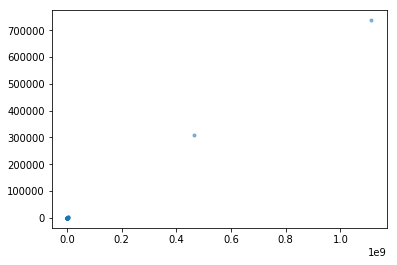

In [80]:
# quick plot to see relationship between annual PV prod and size_kw
plt.scatter(pv_df['annual_pv_prod'].values,
            pv_df['size_kw'].values,
            marker = '.',
            alpha = 0.5,
            )
plt.show()

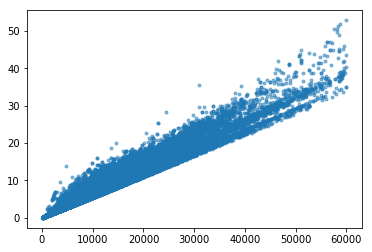

In [81]:
# use mask to reduce outlier impact
plt.scatter(pv_df[pv_df['annual_pv_prod']<60000].annual_pv_prod.values,
            pv_df[pv_df['annual_pv_prod']<60000].size_kw.values,
            marker = '.',
            alpha = 0.5,
            )
plt.show()

In [82]:
# FILL MISSING VALUES OF ANNUAL PV PRODUCTION

# common denominator = annual_pv_produced / system_size
pv_df['size_kw'].describe()
common_denom = pv_df['annual_pv_prod'] / pv_df['size_kw'].values

print(common_denom.describe())
print(np.count_nonzero(common_denom.isnull().values))
# NOTE:
#       mean and median are nearly equal and stand. dev. is relatively small
#       therefore, this could be a reasonably accurate method to fillna
#       Also, size of the system will generally determine the output

count   695447.0000
mean      1481.9326
std        165.6300
min        345.4355
25%       1334.8381
50%       1528.7861
75%       1572.1466
max       1825.9442
Name: annual_pv_prod, dtype: float64
191208


In [83]:
# annual insol common denominator 
pv_df['annual_insolation'].describe()
common_denom_insol = pv_df['annual_pv_prod'] / pv_df['annual_insolation'].values
common_denom_insol.describe()
# not as good as using size_kw

count      695447.0000
mean         2169.2121
std        264375.8555
min             1.6112
25%          1096.5823
50%          1548.3317
75%          2144.6585
max     203459281.7182
Name: annual_pv_prod, dtype: float64

In [84]:
# NOTE:
#     common denom has missing values as a result
#     fill missing values with its median
common_denom = common_denom.fillna(common_denom.median())
common_denom.describe()

count   886655.0000
mean      1492.0366
std        147.9479
min        345.4355
25%       1405.8169
50%       1528.7861
75%       1560.7252
max       1825.9442
Name: annual_pv_prod, dtype: float64

In [85]:
# COMPARE TWO RESULTS

# annual pv fill = common_denom * size
annual_pv_infer = common_denom * pv_df['size_kw'].values
print(annual_pv_infer.describe())
print(pv_df['annual_pv_prod'].describe())

count       886655.0000
mean         10984.7394
std        1282398.4804
min              8.6602
25%           5640.4733
50%           8037.7193
75%          11161.7068
max     1113475807.0000
Name: annual_pv_prod, dtype: float64
count       695447.0000
mean         11461.0805
std        1446838.6639
min              8.6602
25%           5745.1178
50%           8125.0994
75%          11199.7587
max     1113475807.0000
Name: annual_pv_prod, dtype: float64


In [86]:
np.count_nonzero(annual_pv_infer.isnull())

0

In [87]:
# check the error between actual and calculated energy production
error = abs(annual_pv_infer - pv_df['annual_pv_prod']) / pv_df['annual_pv_prod']
error.describe()

count   695447.0000
mean         0.0000
std          0.0000
min          0.0000
25%          0.0000
50%          0.0000
75%          0.0000
max          0.0000
Name: annual_pv_prod, dtype: float64

In [88]:
# fill missing values
pv_df['annual_pv_prod'] = pv_df['annual_pv_prod'].fillna(annual_pv_infer)
print(pv_df['annual_pv_prod'].describe())

# count missing vals again
np.count_nonzero(common_denom.isnull().values)

count       886655.0000
mean         10984.7394
std        1282398.4804
min              8.6602
25%           5640.4733
50%           8037.7193
75%          11161.7068
max     1113475807.0000
Name: annual_pv_prod, dtype: float64


0

In [89]:
#%% SUMMARY STATS: reported_annual_energy_prod
# =============================================================================
# count and explore missing values
# 833,466 missing values
missing_val_count(pv_df, 'reported_annual_energy_prod', True)
# this may be too many missing values to fill as it may lead to a lrager error

print(pv_df['reported_annual_energy_prod'].describe())

pv_df[['reported_annual_energy_prod', 'annual_pv_prod']].head()

count    184936.0000
mean       9136.9687
std       12138.9366
min           0.8841
25%        5518.0000
50%        8070.1500
75%       11311.0000
max     3263750.0000
Name: reported_annual_energy_prod, dtype: float64


,reported_annual_energy_prod,annual_pv_prod
0,13836.0000,14999.8316
1,16419.0000,17811.5744
2,7235.0000,7833.7428
3,9340.0000,10151.7096
4,6729.0000,7307.1338


In [90]:
# SUMMARY STATS: annual_insolation
# use API to fill missing values
# =============================================================================
print(missing_val_count(pv_df, 'annual_insolation'))
print(pv_df['annual_insolation'].describe())

('annual_insolation', 191208)
count   695447.0000
mean         5.2936
std          0.7182
min          1.1775
25%          4.6181
50%          5.4184
75%          5.7036
max          6.7613
Name: annual_insolation, dtype: float64


In [91]:
# explore: insolation rate for each state
# insolation too high for some states: DO NOT USE
state_insol = pv_df.groupby('state')['annual_insolation'].mean()
state_insol.sort_values()
state_insol.describe()

count   23.0000
mean     4.8633
std      0.6835
min      4.2099
25%      4.3924
50%      4.5930
75%      5.1454
max      6.4643
Name: annual_insolation, dtype: float64

In [92]:
# NREL API
# =============================================================================
insol_df = pd.read_csv('insolation_df.csv')
insol_df.head()

,solar_rad,county,state
0,5.4921,travis,tx
1,5.8094,seminole,fl
2,6.5416,pinal,az
3,6.5697,pima,az
4,5.3960,orange,fl


In [93]:
# insol_df['county_state'].head()

In [94]:
# NOTE: 
# - this needs to be done only the first time that the insolation DF is loaded 

# temp = insol_df['county_state'].str.split(',', expand=True)
# insol_df['county'] = temp[0]
# insol_df['state'] = temp[1]
# insol_df.drop(columns = ['county_state'], inplace=True)
# insol_df.head()

In [95]:
# Write insolation_df to file
insol_df.to_csv('insolation_df.csv', encoding='utf-8', index=False)

In [96]:
percent_missing(pv_df)

state                          0.0000
annual_pv_prod                 0.0000
county                         0.0000
model1_clean                   0.0000
utility_clean                  0.0000
city                           0.0000
3rdparty                       0.0000
install_type                   0.0000
zipcode                        0.0000
size_kw                        0.0000
incentive_prog_names           0.0000
date_installed                 0.0000
installer                      0.0000
annual_insolation             21.5651
cost_per_watt                 25.4072
cost                          25.4177
tech_1                        39.7822
tracking_type                 44.1172
tilt1                         59.2087
azimuth1                      61.5380
rebate                        62.5498
sales_tax_cost                66.1306
reported_annual_energy_prod   79.1423
dtype: float64

In [97]:
#pv_df = drop_n_reset(pv_df)
#pv_df.info()

In [98]:
# WRITE FILE
# =============================================================================
# write to file cleaned data before merging with other DFs
pv_df.to_csv('pv_df_short.csv', encoding='utf-8', na_rep='NA', index=False)
print('File written to:', os.getcwd())

File written to: C:\Users\smouz\OneDrive\Desktop\DataSci\Python\SP-Capstone-PY\Capstone


In [99]:
# MERGE DFs

# Merge the following daaframes into one:
# - solar radiation(insolation)
# - incentives
# - state abbreviations
# - population

# function to load DFs
def load_csv(file_name):
    df = pd.read_csv(file_name, low_memory=False)
    return df

In [100]:
incentives_df = load_csv('incentives_df.csv')
states_abbv = load_csv('states_abbreviation.csv')
pop_df = load_csv('population_df.csv')
insolation_df = load_csv('insolation_df.csv')

In [101]:
pv_df = load_csv('pv_df_short.csv')
pv_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 886655 entries, 0 to 886654
Data columns (total 23 columns):
state                          886655 non-null object
date_installed                 886655 non-null object
incentive_prog_names           710174 non-null object
size_kw                        886655 non-null float64
zipcode                        886655 non-null int64
install_type                   886655 non-null object
installer                      641410 non-null object
cost_per_watt                  661381 non-null float64
cost                           661288 non-null float64
city                           712730 non-null object
utility_clean                  706910 non-null object
tech_1                         533924 non-null object
model1_clean                   533924 non-null object
county                         877357 non-null object
annual_pv_prod                 886655 non-null float64
annual_insolation              695447 non-null float64
rebate               

In [102]:
print(states_abbv.head(),
      '\n\n',
     pop_df.head(),
      '\n\n',
      incentives_df.head(),
      '\n\n',
      insolation_df.head(),
     )

  abbreviation            full
0           ak          alaska
1           al         alabama
2           ar        arkansas
3           as  american samoa
4           az         arizona 

          cities  population        states
0      new york     8405837      new york
1   los angeles     3884307    california
2       chicago     2718782      illinois
3       houston     2195914         texas
4  philadelphia     1553165  pennsylvania 

         county_state  incentive_count
0         travis, tx               38
1      san mateo, ca               59
2     williamson, tx               41
3    santa clara, ca               59
4  san francisco, ca               59 

    solar_rad    county state
0     5.4921    travis    tx
1     5.8094  seminole    fl
2     6.5416     pinal    az
3     6.5697      pima    az
4     5.3960    orange    fl


In [103]:
# split columns into county and state, save to temporary series
tmp = incentives_df['county_state'].str.split(',', expand=True)
tmp
# rename columns
incentives_df['county'] = tmp[0]
incentives_df['state'] = tmp[1]
# drop column 'county_state'
incentives_df.drop(columns='county_state', inplace=True)

In [104]:
# strip leading spaces on 'state'
incentives_df['state'] = incentives_df['state'].str.strip()
# incentives_df

In [105]:
insolation_df['state'] = insolation_df['state'].str.strip()

In [106]:
# take note of missing values before merging and filling NAs
percent_missing(pv_df)

state                          0.0000
annual_pv_prod                 0.0000
install_type                   0.0000
zipcode                        0.0000
3rdparty                       0.0000
date_installed                 0.0000
size_kw                        0.0000
county                         1.0487
city                          19.6159
incentive_prog_names          19.9041
utility_clean                 20.2723
annual_insolation             21.5651
cost_per_watt                 25.4072
cost                          25.4177
installer                     27.6596
model1_clean                  39.7822
tech_1                        39.7822
tracking_type                 44.1172
tilt1                         59.2087
azimuth1                      61.5380
rebate                        62.5498
sales_tax_cost                66.1306
reported_annual_energy_prod   79.1423
dtype: float64

In [107]:
# fill missing values in working DF (pv_df) using data obtain through API
# insolation_df contains the data acquired earlier from API
pv_df = pv_df.merge(insolation_df, how='left').merge(incentives_df, how='left')
pv_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 886655 entries, 0 to 886654
Data columns (total 25 columns):
state                          886655 non-null object
date_installed                 886655 non-null object
incentive_prog_names           710174 non-null object
size_kw                        886655 non-null float64
zipcode                        886655 non-null int64
install_type                   886655 non-null object
installer                      641410 non-null object
cost_per_watt                  661381 non-null float64
cost                           661288 non-null float64
city                           712730 non-null object
utility_clean                  706910 non-null object
tech_1                         533924 non-null object
model1_clean                   533924 non-null object
county                         877357 non-null object
annual_pv_prod                 886655 non-null float64
annual_insolation              695447 non-null float64
rebate               

In [108]:

# fill existing insolation missing values from 'solar_rad' obtained through an API
pv_df['annual_insolation'].fillna(pv_df['solar_rad'], inplace=True)


# NOTE:
# - this needs to be done only the first time that the insolation DF is loaded 

# then drop unnecessary columns
# pv_df.drop(columns=['county_state', 'solar_rad'], inplace=True)
pv_df.drop(columns=['solar_rad'], inplace=True)

In [109]:
# percent_missing(pv_df)
state_mean_insolation = pv_df.groupby(['state'])['annual_insolation'].agg('mean')

In [110]:
# set index to 'state' in order to fill values by state average
pv_df = pv_df.set_index('state')
pv_df['annual_insolation'].fillna(state_mean_insolation, inplace=True)

# reset index and drop previous index
pv_df = pv_df.reset_index()

In [111]:
pv_df[pv_df['annual_insolation'].isnull()][['state', 'county', 'annual_insolation']]

,state,county,annual_insolation
457,ak,NaN,nan
88251,ak,yukon-koyukuk,nan
91148,ak,southeast fairbanks,nan
98362,ak,matanuska-susitna,nan
100629,ak,fairbanks north star,nan
100688,ak,fairbanks north star,nan
100689,ak,fairbanks north star,nan
100690,ak,fairbanks north star,nan
100691,ak,fairbanks north star,nan
100692,ak,matanuska-susitna,nan


In [112]:
percent_missing(pv_df)

state                          0.0000
date_installed                 0.0000
size_kw                        0.0000
zipcode                        0.0000
install_type                   0.0000
annual_pv_prod                 0.0000
3rdparty                       0.0000
annual_insolation              0.0014
county                         1.0487
incentive_count                1.1477
city                          19.6159
incentive_prog_names          19.9041
utility_clean                 20.2723
cost_per_watt                 25.4072
cost                          25.4177
installer                     27.6596
model1_clean                  39.7822
tech_1                        39.7822
tracking_type                 44.1172
tilt1                         59.2087
azimuth1                      61.5380
rebate                        62.5498
sales_tax_cost                66.1306
reported_annual_energy_prod   79.1423
dtype: float64

In [113]:
pv_df = drop_n_reset(pv_df)

## Write to File

In [114]:
# write file

filename = 'pv_df_clean.csv'
print('Writing file:', filename)
pv_df.to_csv(filename, encoding='utf-8', na_rep='NA', index=False)
print('Finished writing to:', os.getcwd())

Writing file: pv_df_clean.csv
Finished writing to: C:\Users\smouz\OneDrive\Desktop\DataSci\Python\SP-Capstone-PY\Capstone


In [115]:
pv_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 886655 entries, 0 to 886654
Data columns (total 24 columns):
state                          886655 non-null object
date_installed                 886655 non-null object
incentive_prog_names           710174 non-null object
size_kw                        886655 non-null float64
zipcode                        886655 non-null int64
install_type                   886655 non-null object
installer                      641410 non-null object
cost_per_watt                  661381 non-null float64
cost                           661288 non-null float64
city                           712730 non-null object
utility_clean                  706910 non-null object
tech_1                         533924 non-null object
model1_clean                   533924 non-null object
county                         877357 non-null object
annual_pv_prod                 886655 non-null float64
annual_insolation              886643 non-null float64
rebate               

## Merge with Population

Merge with population dataframe to see how much data is retained/lost

In [116]:
# POPULATION MERGE

# merge with population data
print(pop_df.head()); print(states_abbv.head())

         cities  population        states
0      new york     8405837      new york
1   los angeles     3884307    california
2       chicago     2718782      illinois
3       houston     2195914         texas
4  philadelphia     1553165  pennsylvania
  abbreviation            full
0           ak          alaska
1           al         alabama
2           ar        arkansas
3           as  american samoa
4           az         arizona


In [117]:
city_population_df = pop_df.merge(states_abbv, left_on='states', right_on='full')

In [118]:
city_population_df.drop(columns='full', inplace=True)

In [119]:
city_population_df = drop_n_reset(city_population_df)
pv_df = drop_n_reset(pv_df)

In [120]:
pv_df.head()

,state,date_installed,incentive_prog_names,size_kw,zipcode,...,tracking_type,azimuth1,reported_annual_energy_prod,3rdparty,incentive_count
0,tx,2013-12-12,austin energy,10.5600,78702,...,fixed,180.0000,13836.0000,0,38.0000
1,tx,2014-07-11,austin energy,12.7200,78702,...,fixed,180.0000,16419.0000,0,38.0000
2,tx,2014-01-17,austin energy,5.4000,78702,...,fixed,165.0000,7235.0000,0,38.0000
3,tx,2012-09-27,austin energy,7.5000,78702,...,fixed,260.0000,9340.0000,0,38.0000
4,tx,2012-09-26,austin energy,5.0000,78702,...,fixed,205.0000,6729.0000,0,38.0000


In [121]:
pv_merge = pv_df.merge(city_population_df, left_on=['city','state'], right_on=['cities', 'abbreviation'], how='left')

In [122]:
pv_merge.drop(columns=['cities','states','abbreviation'], inplace=True)

In [123]:
# pv_merge.info()
pv_merge[['state', 'county', 'city', 'population']].sort_values('population', ascending=False)

,state,county,city,population
195015,ny,new york,new york,8405837.0000
195005,ny,new york,new york,8405837.0000
195012,ny,new york,new york,8405837.0000
195011,ny,new york,new york,8405837.0000
195010,ny,new york,new york,8405837.0000
195009,ny,new york,new york,8405837.0000
195008,ny,new york,new york,8405837.0000
195006,ny,new york,new york,8405837.0000
195004,ny,new york,new york,8405837.0000
195014,ny,new york,new york,8405837.0000


In [124]:
pv_merge[pv_merge['city'] == 'waterloo']

,state,date_installed,incentive_prog_names,size_kw,zipcode,...,azimuth1,reported_annual_energy_prod,3rdparty,incentive_count,population
23979,wi,2015-06-04,wisconsin focus on energy,11.0000,53594,...,nan,12331.0000,0,34.0000,nan
76870,ny,2015-12-28,new york state energy research and development...,10.6000,13165,...,nan,12442.7000,0,40.0000,nan
76871,ny,2014-07-24,new york state energy research and development...,10.3400,13165,...,nan,12137.5100,0,40.0000,nan
76872,ny,2013-12-02,new york state energy research and development...,7.4200,13165,...,nan,8709.8900,0,40.0000,nan
76873,ny,2015-06-05,new york state energy research and development...,4.3400,13165,...,nan,5088.6000,1,40.0000,nan
76874,ny,2015-06-16,new york state energy research and development...,5.7000,13165,...,nan,6690.8900,0,40.0000,nan
76875,ny,2015-08-27,new york state energy research and development...,12.6000,13165,...,nan,14790.3800,0,40.0000,nan
76876,ny,2009-06-16,new york state energy research and development...,9.5200,13165,...,nan,11174.9600,0,40.0000,nan
76877,ny,2014-09-29,new york state energy research and development...,19.8800,13165,...,nan,23330.0700,0,40.0000,nan
76878,ny,2015-11-04,new york state energy research and development...,8.4200,13165,...,nan,9877.8600,1,40.0000,nan
